The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [162]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
nobel = pd.read_csv("data/nobel.csv")
# Preview the data
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [163]:
# Check null values
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

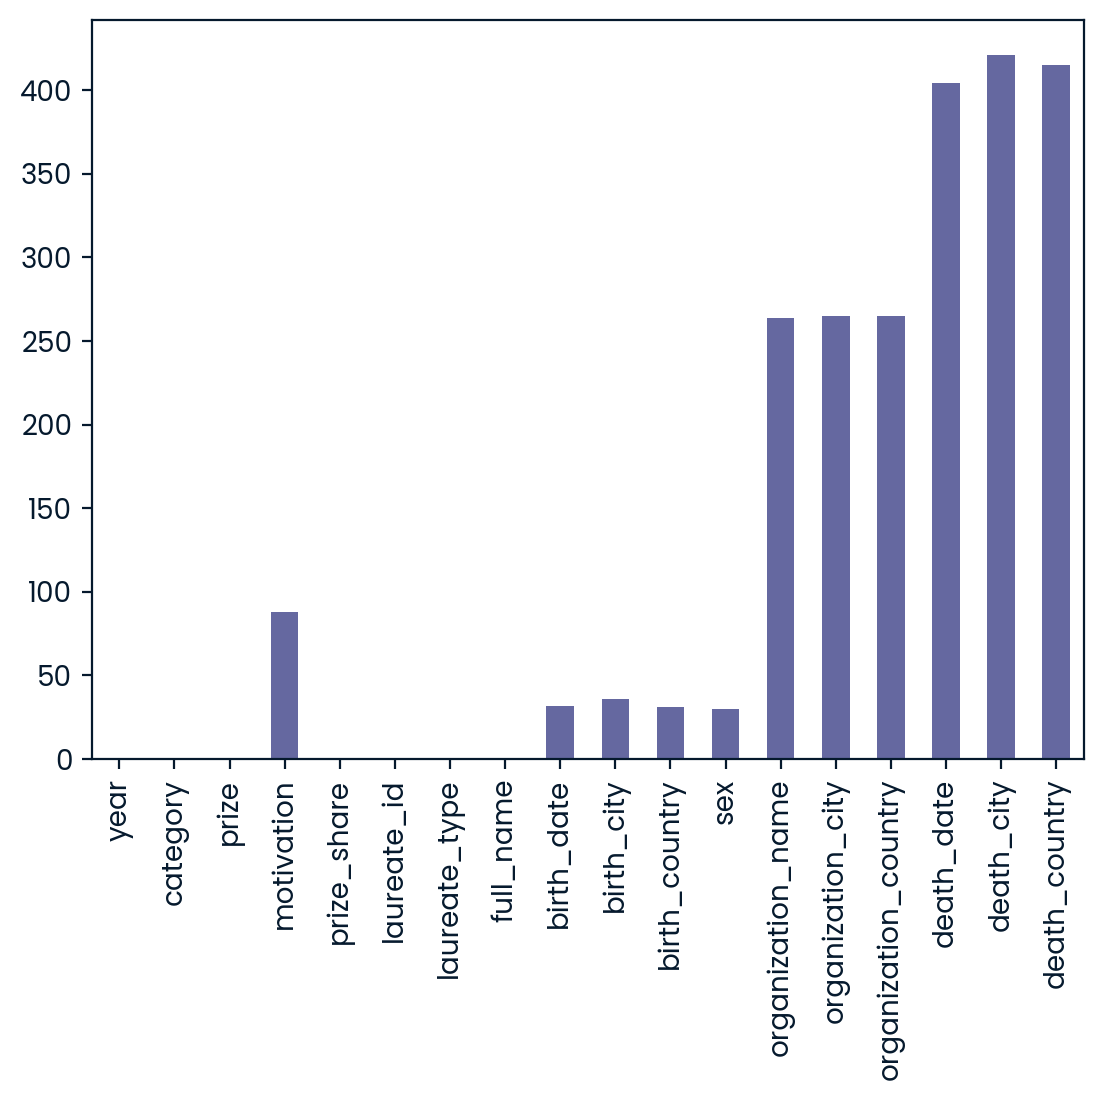

In [164]:
# Visualize the null values
nobel.isnull().sum().plot(kind="bar") 
plt.show() 

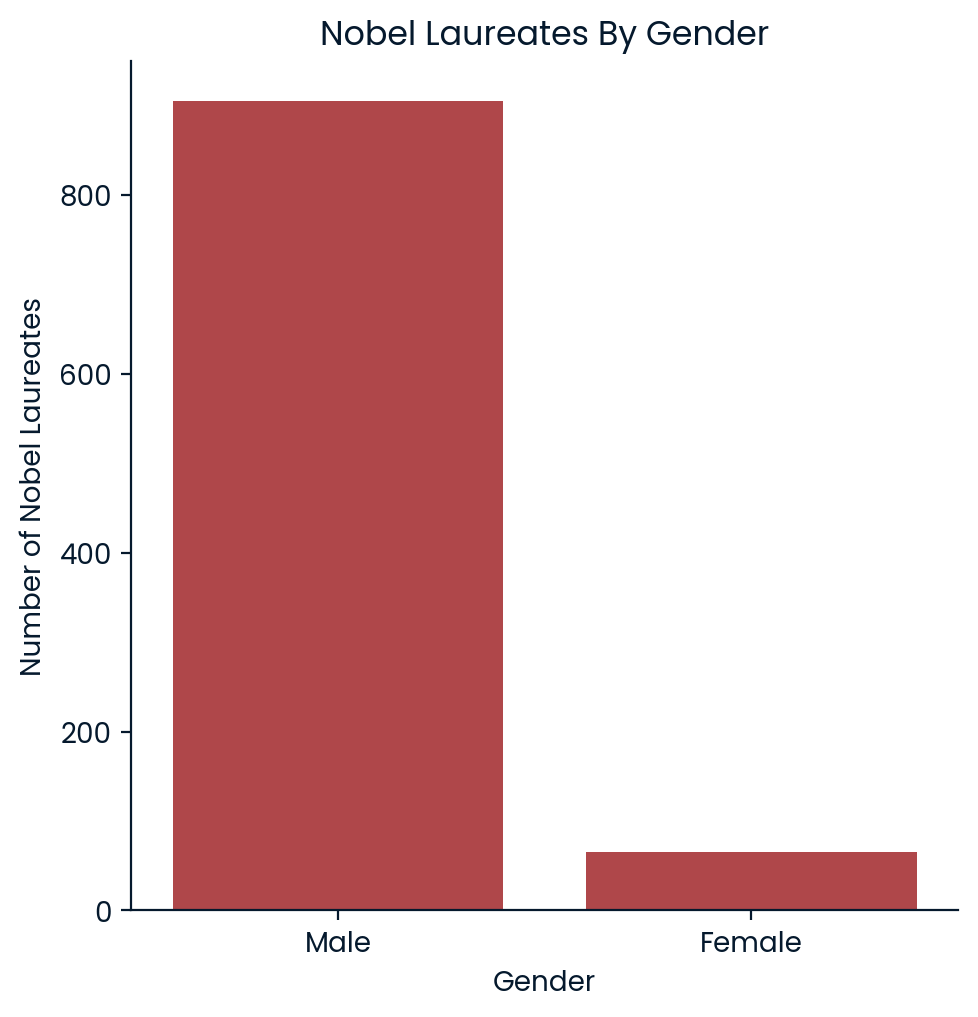

In [183]:
# Check the most common gender
sns.set_palette("RdBu")
    
sns.catplot(x="sex", data=nobel, kind="count")

plt.xlabel('Gender')
plt.ylabel('Number of Nobel Laureates')
plt.title('Nobel Laureates By Gender')

plt.show()

In [166]:
# Store most commonly awarded gender
top_gender = nobel['sex'].value_counts().index[0]

The most commonly awarded gender is male.

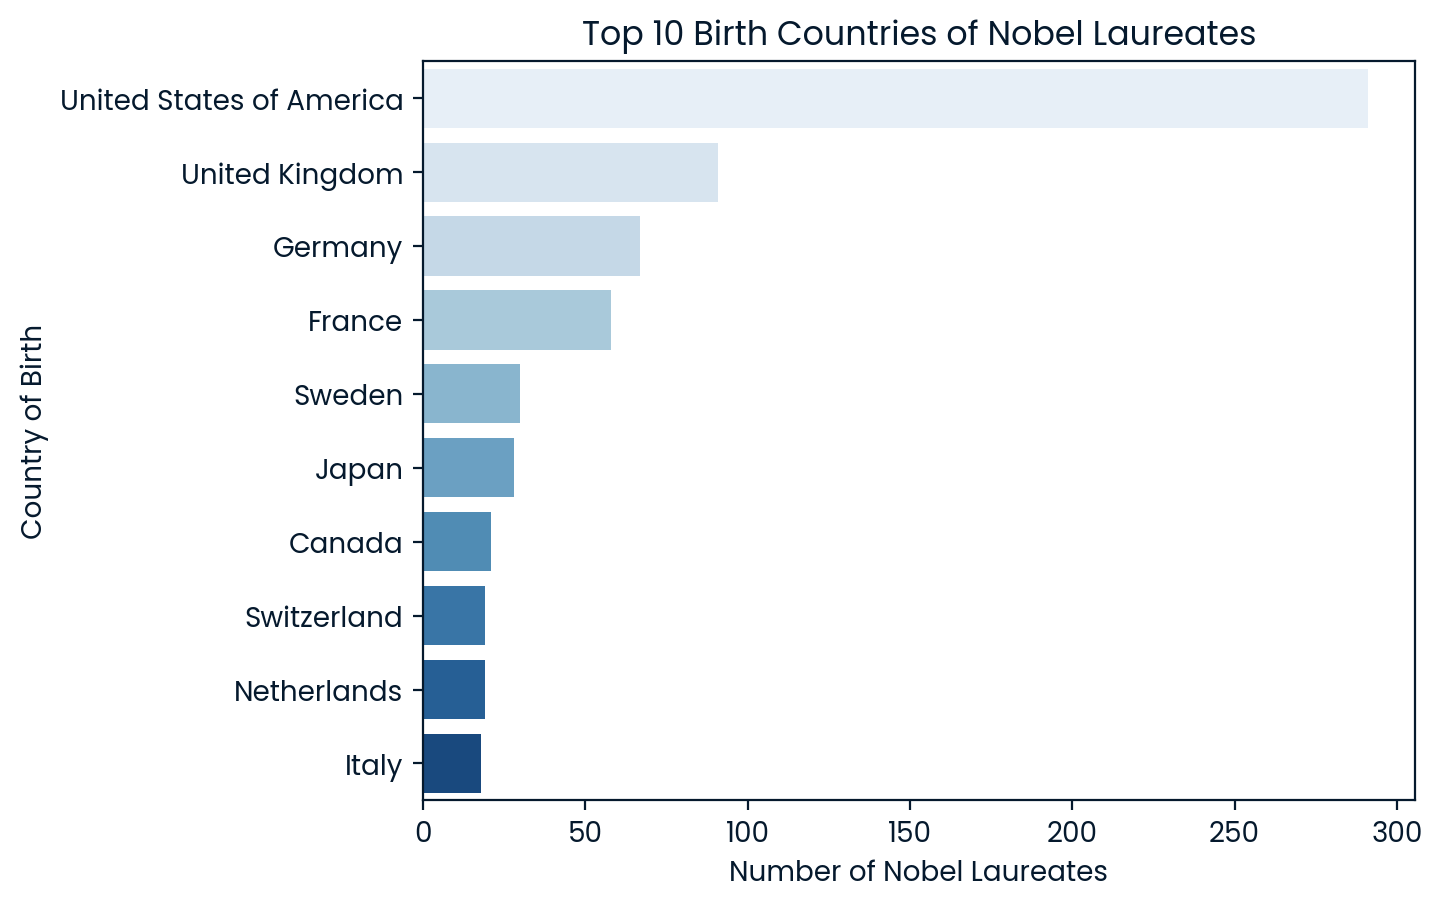

In [186]:
# Check the most common birth country
birth = nobel['birth_country']
sorted_birth = birth.value_counts()
sorted_birth = sorted_birth.head(10)
    
sns.barplot(x=sorted_birth.values, y=sorted_birth.index, palette="Blues")

plt.xlabel('Number of Nobel Laureates')
plt.ylabel('Country of Birth')
plt.title('Top 10 Birth Countries of Nobel Laureates')

plt.show()


In [168]:
# Store the most commonly awarded birth country
top_country = nobel['birth_country'].value_counts().index[0]

The most commonly awarded birth country is the United States of America

In [169]:
# Add column to indicate US-born winners
nobel['us_winners'] = nobel['birth_country'] == 'United States of America'

# Get decade the year belongs to
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us_winners,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900


In [170]:
# Find average US winners per decade
us_winner_ratio = nobel.groupby("decade", as_index=False)["us_winners"].mean()
us_winner_ratio

,decade,us_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


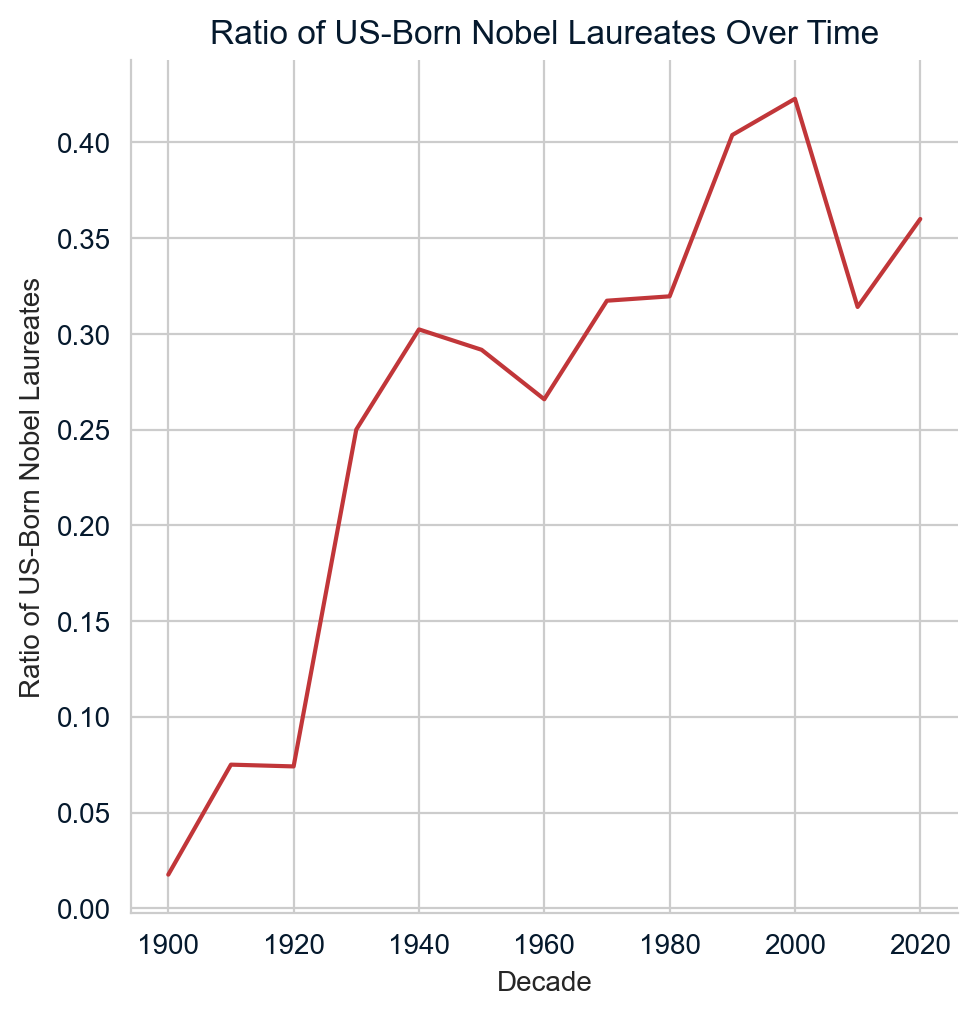

In [187]:
sns.set_style("whitegrid")
    
sns.relplot(x="decade", y="us_winners", data=us_winner_ratio, kind="line")

plt.xlabel('Decade')
plt.ylabel('Ratio of US-Born Nobel Laureates')
plt.title('Ratio of US-Born Nobel Laureates Over Time')

plt.show()

In [172]:
max_decade_usa = us_winner_ratio[us_winner_ratio['us_winners'] == us_winner_ratio['us_winners'].max()]['decade'].values[0]

The decade that has the highest ratio of US-born Nobel Prize winners to total winners in all categories is the 2000s.

In [173]:
# Add column to indicate female winners
nobel['is_female'] = nobel['sex'] == 'Female'

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us_winners,decade,is_female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [174]:
# Group ratio of female winners by decade and category
female_winner = nobel.groupby(['decade','category'], as_index=False)['is_female'].mean()
female_winner.head()

,decade,category,is_female
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


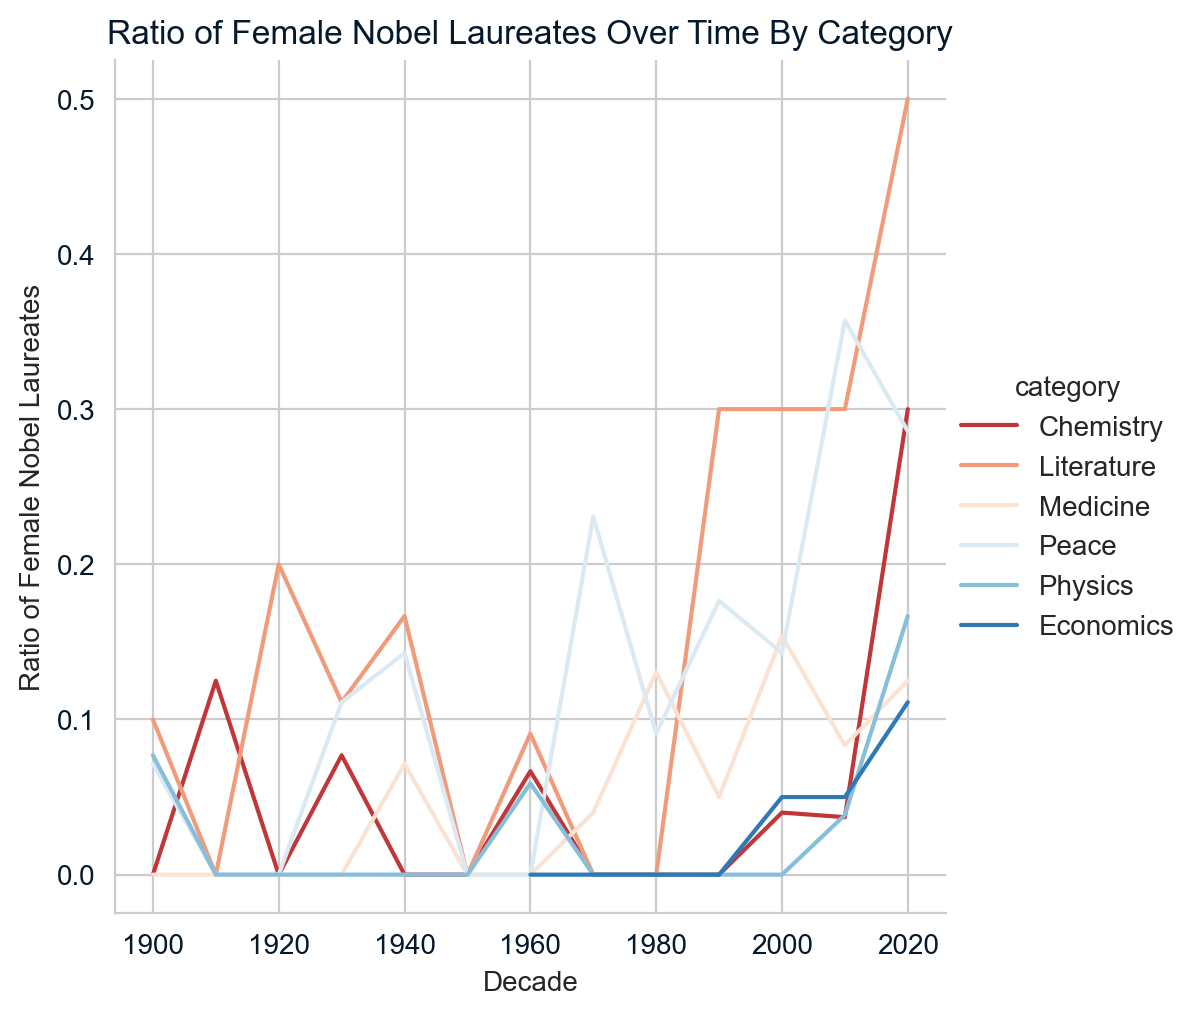

In [188]:
sns.relplot(x="decade", y="is_female", data=female_winner, hue="category", kind="line")

plt.xlabel('Decade')
plt.ylabel('Ratio of Female Nobel Laureates')
plt.title('Ratio of Female Nobel Laureates Over Time By Category')

plt.show()

In [176]:
# Store decade and category combination with highest proportion of female laureates
max_female_winner = female_winner[female_winner['is_female'] == female_winner['is_female'].max()][['decade', 'category']]
max_female_dict = {max_female_winner['decade'].values[0]: max_female_winner['category'].values[0]}

The decade and Nobel Prize category combination had the highest proportion of female laureates is the 2020s in the category Literature.

In [177]:
# Filter dataframe for female winners
nobel_f = nobel[nobel['is_female']==True]
nobel_f.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us_winners,decade,is_female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True


In [178]:
# Find first female nobel winner
first_f_winner = nobel_f[nobel_f['year'] == nobel_f['year'].min()][['full_name','category']]

In [179]:
# Store name and category of first female winner
first_woman_name = first_f_winner['full_name'].values[0]
first_woman_category = first_f_winner['category'].values[0]

The first female Nobel Prize Winner is Marie Curie in the Physics category.

In [180]:
# Count values in full_name column
counts = nobel['full_name'].value_counts()

# Find counts of two or more
counts[counts >= 2].index

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object')

In [181]:
# Store names of individuals or organizations have won more than one Nobel Prize throughout the years in a list
repeat_list = list(counts[counts >= 2].index)

The individuals or organizations that have won more than one Nobel Prize throughout the years are Comité international de la Croix Rouge (International Committee of the Red Cross),Linus Carl Pauling, John Bardeen, Frederick Sanger, Marie Curie, née Sklodowska, Office of the United Nations High Commissioner for Refugees (UNHCR) 